In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Genratation


In [3]:
np.random.seed(1)
hours_studied = np.random.uniform(0, 10, 100)

In [4]:
# exam_scores
exam_scores = 50 + 5 * hours_studied + np.random.normal(0, 2, 100)  # Linear relationship with noise


In [5]:
#Creating a data frame with hours_studied and exam_scores
data = pd.DataFrame({'Hours_Studied': hours_studied, 'Exam_Scores': exam_scores})
data.head()


,Hours_Studied,Exam_Scores
0,4.170220,71.482370
1,7.203245,81.971822
2,0.001144,49.393311
3,3.023326,66.772578
4,1.467559,57.797984


### Visulize the Data

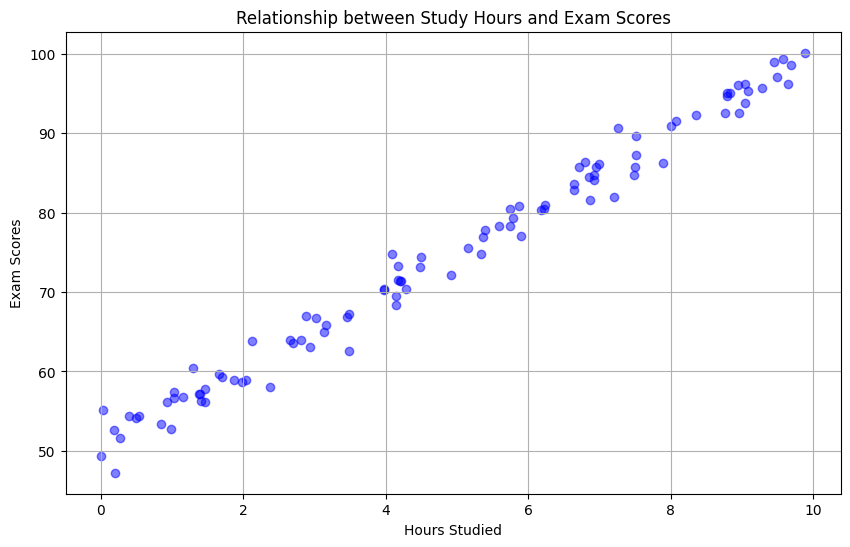

In [6]:
#plot the dataframe 
plt.figure(figsize=(10,6))
plt.scatter(data['Hours_Studied'], data['Exam_Scores'], color='blue', alpha=0.5)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.title('Relationship between Study Hours and Exam Scores')
plt.grid(True)
plt.show()
    

### Data splitting


In [7]:
# Split the data into training and testing sets (80% training, 20% testing)

# X --> independent variable / feature used to make predictions
# y --> dependent variable / target variable being predicted    
X = data[['Hours_Studied']]
y = data['Exam_Scores']
# Using train_test_split to:
# - Split data into training (80%) and testing (20%) sets
# - random_state=42 for randomization

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Model Training

In [8]:
# Create and train a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

### Model Evaluation

In [9]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [10]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.900870867264479
R-squared: 0.9852067884764849


### Visualization and Interpretation


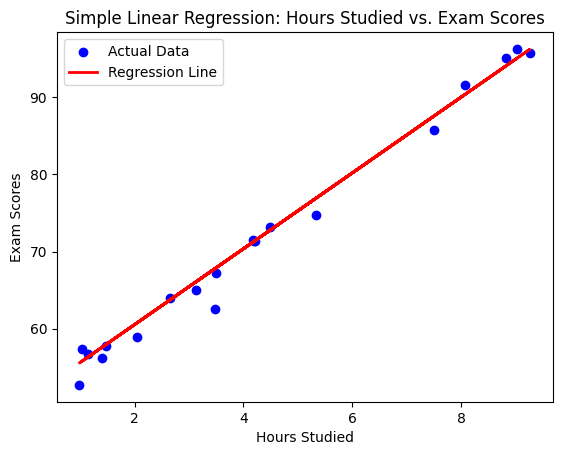

Slope (Coefficient): 4.90
Intercept: 50.75


In [12]:
# Plot the regression line and data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.legend()
plt.title('Simple Linear Regression: Hours Studied vs. Exam Scores')
plt.show()

# Interpret the model's coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope (Coefficient): {slope:.2f}')
print(f'Intercept: {intercept:.2f}')

In [13]:
# Predict the score for provided input hours
hours = [[5.5]]
predicted_score = model.predict(hours)
# print(f'Predicted Score: {predicted_score[0]}')
# point after two value
print(f'Predicted Score: {predicted_score[0]:.2f}') 

Predicted Score: 77.72


/Users/zeelshiyani/miniforge3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Make a function to predict the score for provided input hours


In [14]:
def predict_score(hours):
    return model.predict([[hours]])

print(predict_score(5.5))

[77.71897972]


/Users/zeelshiyani/miniforge3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
